# House Prices Exploratory Data Analysis

### Linear Regression, Features, and Regularization

<b> Objective: </b> Study House Prices in Ames,Iowa using linear regression to predict sale prices from features such as size, number of bathrooms and neighborhood. While adding many features into the model, the project needs to avoid overfitting the training set using regularization along the way. And, Ridge Regression will be used to shrink the weights, requiring an extra parameter to control the extenet of shrinking. Validation will be applied to guess-and-check different values for the extra parameter.

In [120]:
# Import some packages for Data Science
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge

# Modify some settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['font.size'] = 16
plt.rcParams['figure.dpi'] = 150

pd.options.display.max_rows = 20
pd.options.display.max_columns = 15

np.random.seed(47)

# Import some packages to help with configuration
import os, sys
from IPython.display import Image

In [121]:
# Check
assert 'pandas' in sys.modules and "pd" in locals()
assert 'numpy' in sys.modules and "np" in locals()
assert 'matplotlib' in sys.modules and "plt" in locals()
assert 'seaborn' in sys.modules and "sns" in locals()

### Accessing the Data

In [122]:
# Load Data
training_data = pd.read_csv(r"C:\Users\yunej\Contacts\Desktop\Work\Portfolio\House Price EDA\Data\EDA\training_data.csv")

testing_data = pd.read_csv(r"C:\Users\yunej\Contacts\Desktop\Work\Portfolio\House Price EDA\Data\EDA\testing_data.csv")

#### View the First 5 Rows in Data

In [123]:
training_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,...,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,...,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,...,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,...,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,...,NaN,0,12,2008,WD,Normal,250000


In [124]:
training_data.shape

(996, 81)

In [125]:
testing_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,415,60,RL,59.0,11228,Pave,NaN,...,NaN,0,12,2008,WD,Normal,228000
1,463,20,RL,60.0,8281,Pave,NaN,...,NaN,0,12,2009,WD,Normal,62383
2,179,20,RL,63.0,17423,Pave,NaN,...,NaN,0,7,2009,New,Partial,501837
3,526,20,FV,62.0,7500,Pave,Pave,...,NaN,0,4,2006,WD,Normal,176000
4,195,20,RL,60.0,7180,Pave,NaN,...,NaN,0,5,2008,WD,Normal,127000


In [126]:
testing_data.shape

(464, 81)

The `training_data`  has 81 features: <br>

- 46 Qualitative Variables
    - 23 nominal
    - 23 ordinal
- 35 Qualitative Variables
    - 14 discrete
    - 21 continuous 
    

The data set contains information that typical homebuyers would want to know. A more detailed description of each variable is included in `data_description.txt`. 

In [127]:
# List of features of training_data
training_data.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'X1stFlrSF', 'X2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
  

#### Data Processing for `testing_data`

We will be using columns `GrLivArea` and `GarageArea` for calculations. So we will check if there are any missing values in these columns and drop the row if there is a missing value.

In [128]:
testing_data.shape

(464, 81)

In [129]:
testing_data.dropna(subset=['GrLivArea', 'GarageArea'], inplace=True)

In [130]:
testing_data.shape

(464, 81)

It seems that there were no missing value.

### Exploratory Data Analysis

We will generate a couple visualizations to understand the relationship between `SalePrice` and other features from the `training_data`

#### Part 1: Summarizing Data

We generate a raincloud plot of `SalePrice`. We combine a histogram with density, a scatter-plot and a box plot.

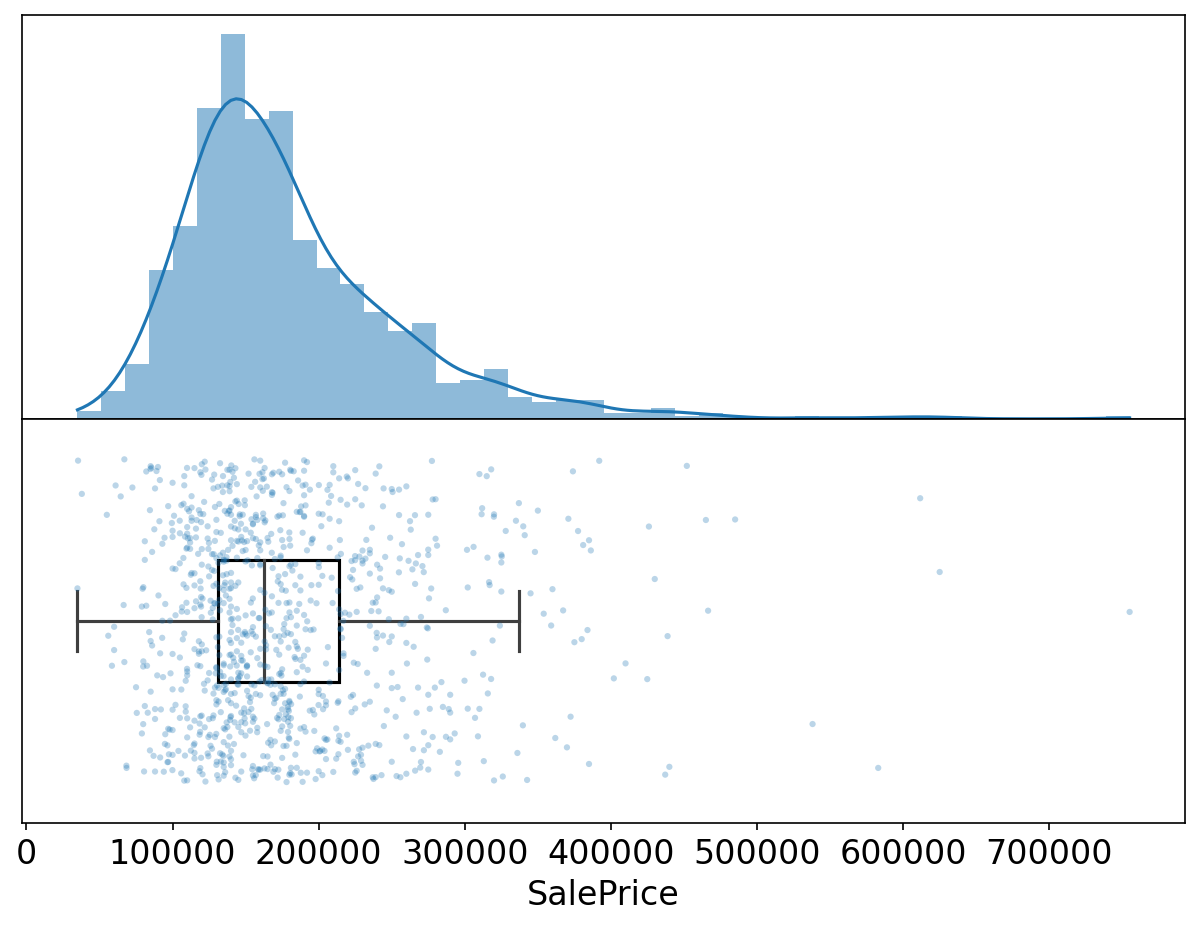

In [131]:
# Create Subplots
fig, axs = plt.subplots(nrows=2)

# Plot Visualizations
sns.histplot(
    training_data['SalePrice'], kde=True,
    ax=axs[0],
    edgecolor=None
)

sns.stripplot(
    x=training_data['SalePrice'],
    jitter=0.4,
    size=3,
    ax=axs[1],
    alpha=0.3
)

sns.boxplot(
    x=training_data['SalePrice'],
    width=0.3,
    ax=axs[1],
    showfliers=False,
    boxprops=dict(facecolor='none', edgecolor='black')
)

# Align axes
spacer = np.max(training_data['SalePrice']) * 0.05
xmin = np.min(training_data['SalePrice']) - spacer
xmax = np.max(training_data['SalePrice']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)


plt.show()

Having visualized data, we should try to summarize the `training_data` with statistics.

In [132]:
training_data['SalePrice'].describe()

count       996.000000
mean     180390.641566
std       77901.528192
min       34900.000000
25%      130875.000000
50%      162900.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [133]:
training_data['SalePrice'].median()

162900.0

Based on the graph and summary statistics above, we can 
1. The distribution of `SalePrice` in the training set is skewed to the right. In other words, most of the data clusters to the left.
2. The mean of `SalePrice` in training set is greater than the median.
3. At least 25% of the houses in the training set sold for more than $200,000.00


### Data Processing

#### Part 2: Number of Bathrooms

We know that Total Bathrooms can be calculated as:

$$
\text{TotalBathrooms} = (\text{BsmtFullBath} + \text{FullBath}) + \frac{1}{2}(\text{BsmtHalfBath} + \text{HalfBath})
$$

In [134]:
def add_total_bathrooms(data):
    """
    Input:
    data: a table containing at least four columns of numbers
    Bsmt_Full_Bath, Full_Bath, Bsmt_Half_Bath, and Half_Bath

    Output:
    Copy of the table with additional column TotalBathrooms
    """

    # make a copy
    with_bathrooms = data.copy()

    # fill missing values with 0
    bath_vars = ['BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath']
    with_bathrooms = with_bathrooms.fillna({var: 0 for var in bath_vars})
    with_bathrooms['TotalBathrooms'] = 0

    # add the TotalBathrooms column
    weights = np.array([1, 1, 0.5, 0.5])
    list1 = []
    with_bathrooms['TotalBathrooms'] = (with_bathrooms[bath_vars[0]] +
                                         with_bathrooms[bath_vars[1]]) + \
                                        ((1/2) * (with_bathrooms[bath_vars[2]] +
                                                  with_bathrooms[bath_vars[3]]))

    return with_bathrooms

training_data = add_total_bathrooms(training_data)
training_data['TotalBathrooms']


0      3.5
1      2.5
2      3.5
3      2.0
4      3.5
      ... 
991    2.0
992    2.0
993    1.0
994    3.0
995    2.0
Name: TotalBathrooms, Length: 996, dtype: float64

Check if there are any missing values in the `TotalBathrooms` column of the `training_data`

In [135]:
assert not training_data['TotalBathrooms'].isnull().any()

Use `sns.boxplot` to generate side-by-side boxplots showing the range of prices for different numbers of bathrooms

0      3.5
1      2.5
2      3.5
3      2.0
4      3.5
      ... 
991    2.0
992    2.0
993    1.0
994    3.0
995    2.0
Name: TotalBathrooms, Length: 996, dtype: float64


Text(0, 0.5, 'Sale Price')

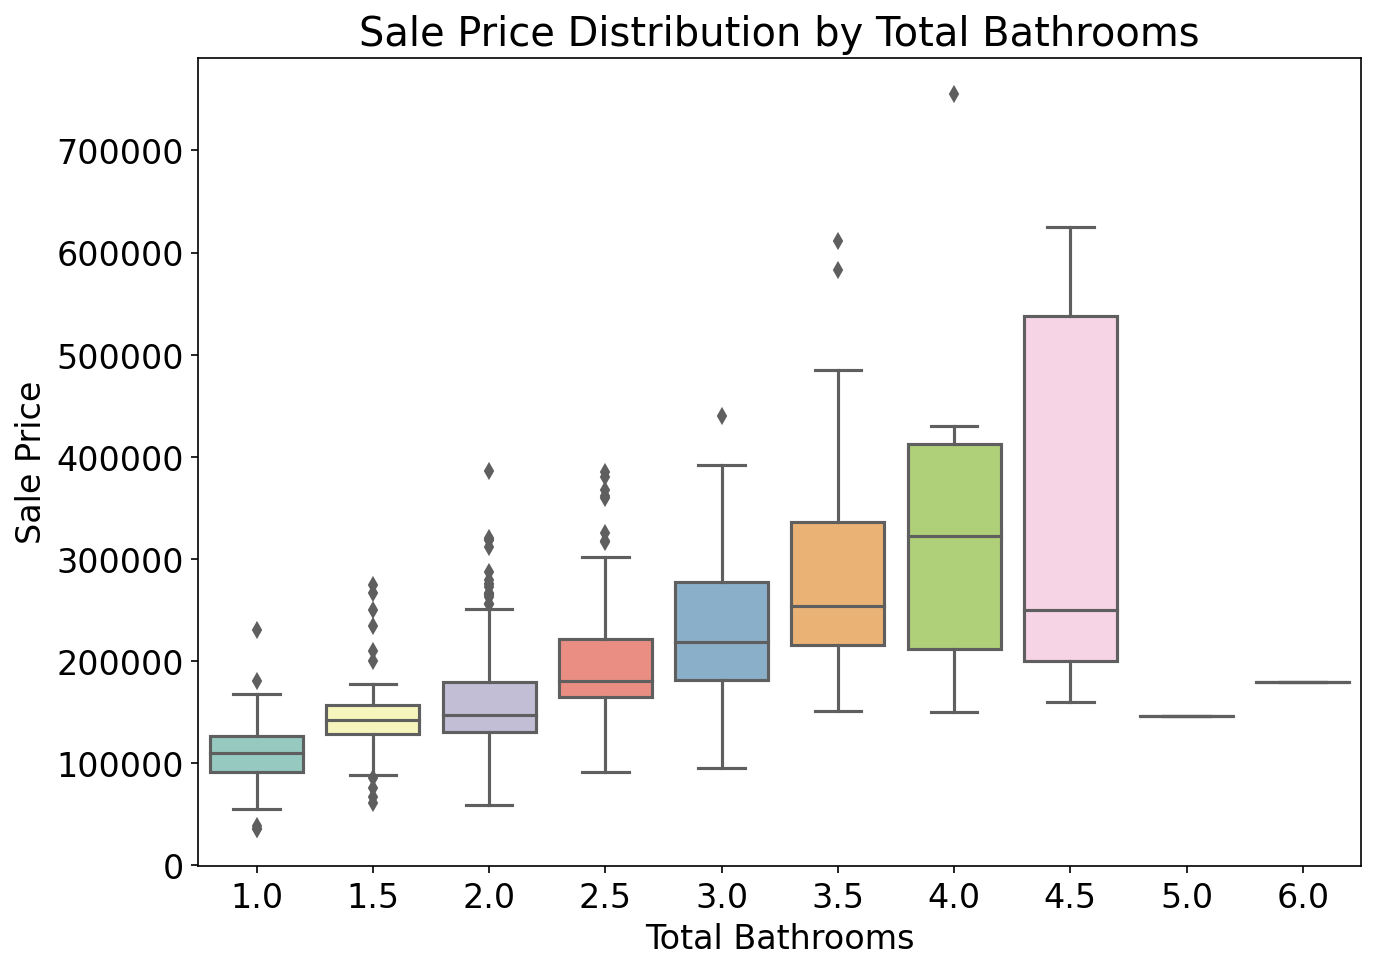

In [136]:
#Print TotalBathrooms
print(training_data['TotalBathrooms'])

# Plot BoxPlot
sns.boxplot(x = 'TotalBathrooms',y = 'SalePrice',data = training_data, palette='Set3' )
plt.title('Sale Price Distribution by Total Bathrooms')
plt.xlabel('Total Bathrooms')
plt.ylabel('Sale Price')

Based on the box plot above, we observe a positive correlation between sale price and the number of bathrooms for houses with 1 to 4 bathrooms. But, the relationship with houses having 4.5 bathrooms appears less conclusive, as the upper quartile suggests potential for higher sale prices while the median is lower compared to houses with 4 bathrooms.

### Encoding Features

We will derive new features from existing features through transformations.

#### Part 3: Size of House and Garage

We can visualize the association between `SalePrice` and `GrLivArea` . The
`data_description.txt` file tells us that `GrLivArea` measures "above grade (ground) living
area square feet." This variable represents the square footage of the house excluding anything underground.

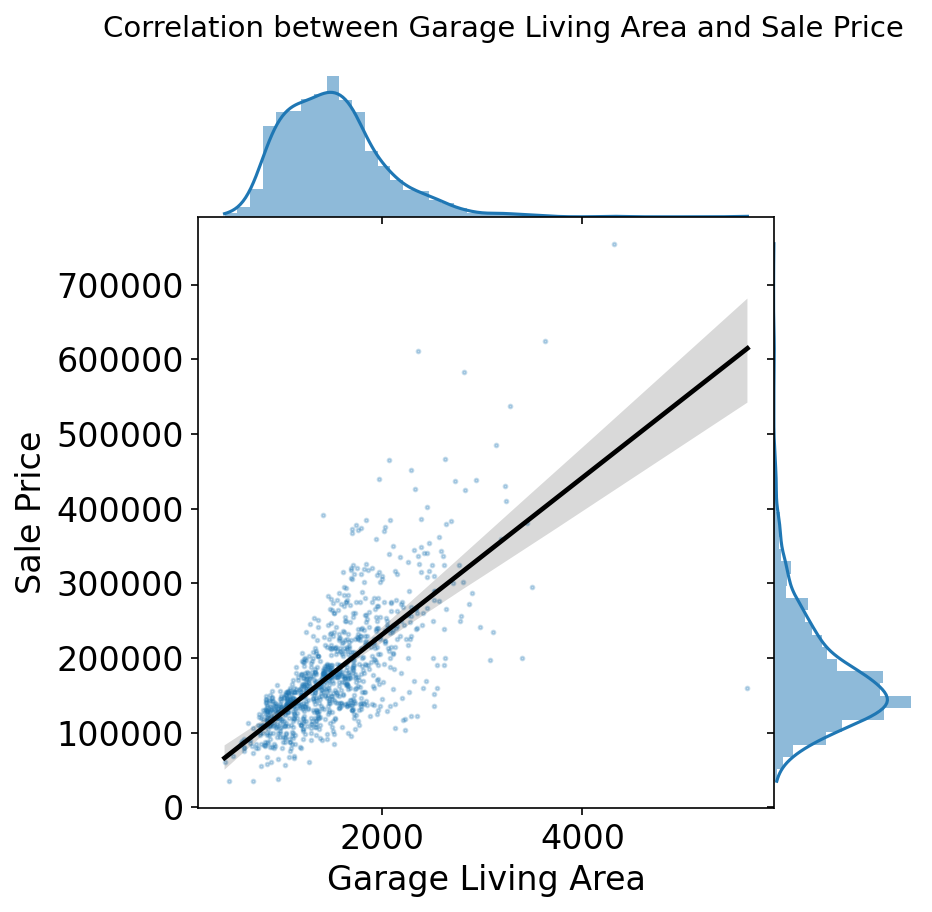

In [137]:
# Create the jointplot
GrLivArea_joint = sns.jointplot(
    x='GrLivArea', y='SalePrice',
    data=training_data, kind="reg",
    ratio=4, space=0,
    scatter_kws={'s': 3, 'alpha': 0.25},
    line_kws={'color': 'black'},
    marginal_kws={'edgecolor': None}
)

# Set the axis labels
GrLivArea_joint.set_axis_labels(xlabel='Garage Living Area', ylabel='Sale Price')

# Add a title
GrLivArea_joint.fig.suptitle('Correlation between Garage Living Area and Sale Price', y=1.02, fontsize=14)

# Display the plot
plt.show()

Since `GrLivArea` excludes the garage space, we visualize the association between `SalePrice` and
`GarageArea`. The `data_description.txt` file tells us that `GarageArea` measures "Size of garage in square
feet".

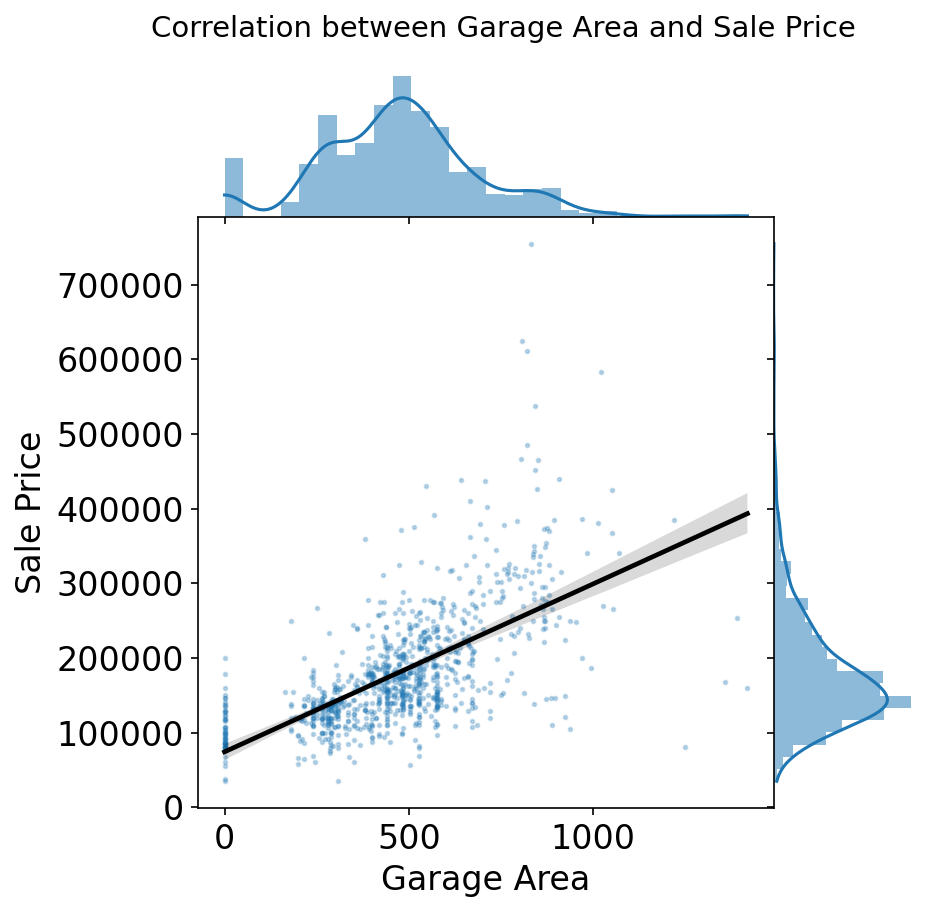

In [138]:
GarageArea_joint = sns.jointplot(
 x='GarageArea', y='SalePrice',
 data=training_data, kind="reg",
 ratio=4, space=0,
 scatter_kws={'s': 3, 'alpha': 0.25},
 line_kws={'color': 'black'},
 marginal_kws={'edgecolor': None}
);

# Set the axis labels
GarageArea_joint.set_axis_labels(xlabel='Garage Area', ylabel='Sale Price')

# Add a title
GarageArea_joint.fig.suptitle('Correlation between Garage Area and Sale Price', y=1.02, fontsize=14)

# Display the plot
plt.show()

We will write a function called `add_power` that inputs
- a table `data`
- a column name `column name` of the table
- positive integer `degree`

and outputs

- a copy of `data` with an additional column caled `column_name<degree>` (without the angle brackets) containing all entries of `column_name` raised to power `degree`. For instance, `add_power(training_data, "Garage_Area", 2)` should add a new column named `Garage_Area2`

In [139]:
def add_power(data, column_name, degree):
 """
 Input:
 data : a table containing column called column_name
 column_name : a string indicating a column in the table
 degree: positive integer
 Output:
 copy of data containing a column called column_name<degree> with e
ntries of column_name to power degree
 """
 with_power = data.copy()

 new_column_name = column_name + str(degree)
 new_column_values = with_power[column_name]**(degree)

 with_power[new_column_name] = new_column_values


 return with_power
training_data = add_power(training_data, "GarageArea", 2)
training_data = add_power(training_data, "GrLivArea", 2)


Among `GrLivArea`, `GrLivArea2`, `GarageArea`, `GarageArea2` which has the largest correlation with `SalePrice`? Remember to use the function `corr` to compute correlations

In [140]:
highest_variable = 'GrLivArea'
corr = training_data.corr( method = "pearson")

In [141]:
assert highest_variable in ['GrLivArea', 'GrLivArea2', 'GarageArea'
, 'GarageArea2']

#### Part 4: Neighborhood

We will take a look at the relationship between neighborhood and sale prices of the houses in our data set.

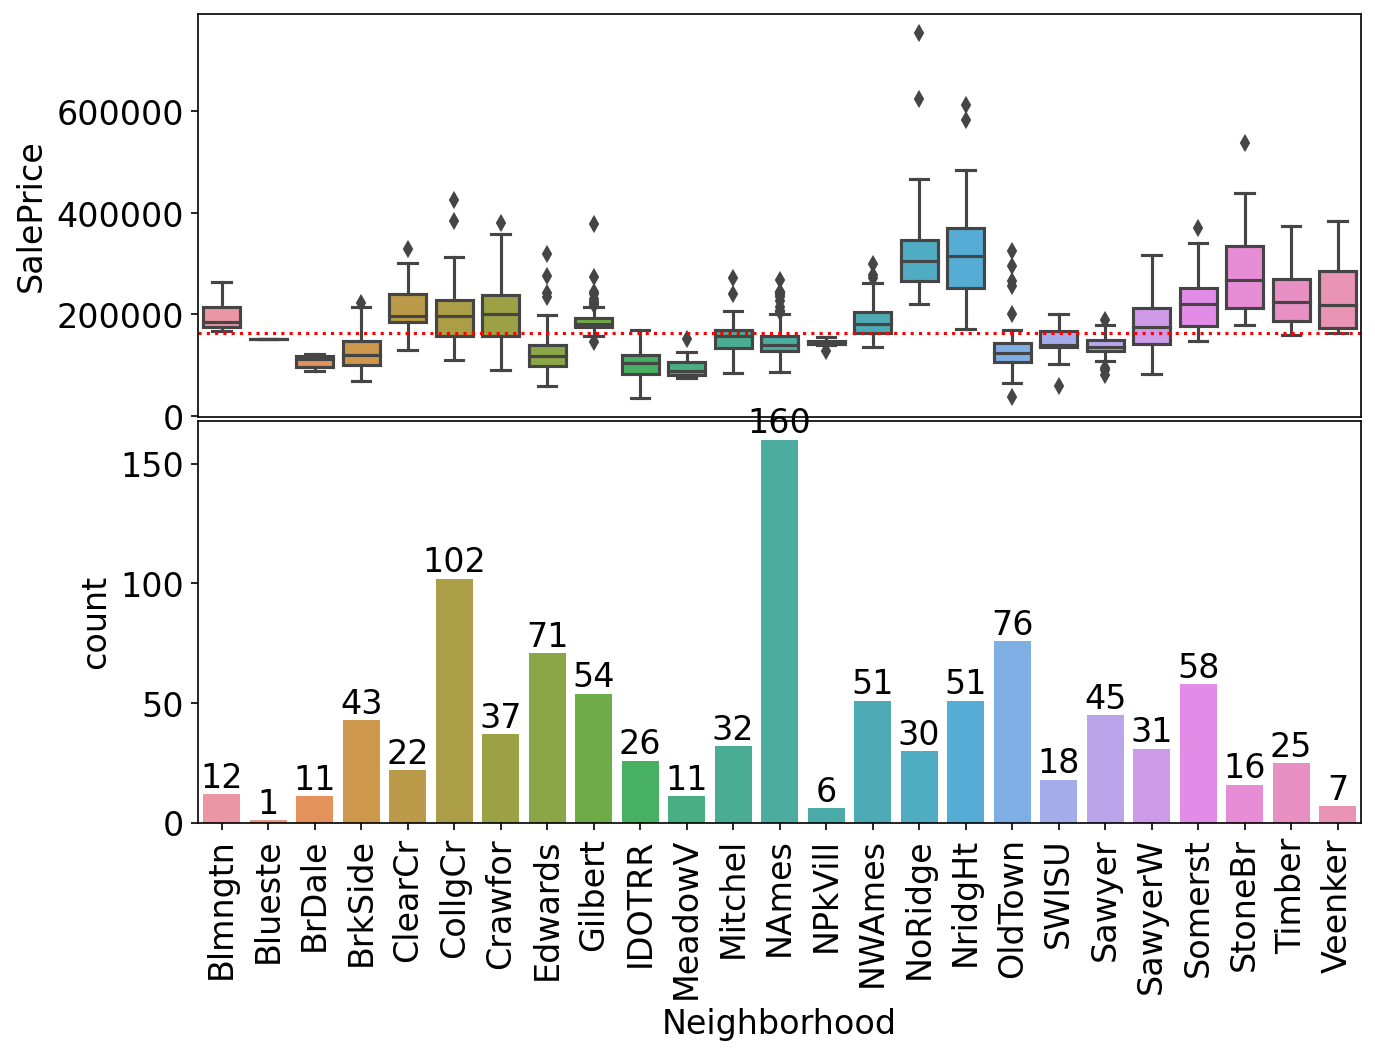

In [142]:
# Plot Visualization
fig, axs = plt.subplots(nrows=2)

# Box Plot
sns.boxplot(
 x='Neighborhood',
 y='SalePrice',
 data=training_data.sort_values('Neighborhood'),
 ax=axs[0])

# Bar Plot
sns.countplot(
 x='Neighborhood',
 data=training_data.sort_values('Neighborhood'),
 ax=axs[1])

# Draw median price
axs[0].axhline(
 y=training_data['SalePrice'].median(),
 color='red',
 linestyle='dotted')

# Label the bars with counts
for patch in axs[1].patches:
 x = patch.get_bbox().get_points()[:, 0]
 y = patch.get_bbox().get_points()[1, 1]
 axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[0].xaxis.set_visible(False)
# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.01)

We find a lot of variation in prices across neighborhoods. Moreover, the amount of data available is not
uniformly distributed among neighborhoods. North Ames, for example, comprises almost 15% of the training
data while Bluestem has only 1 observations in this data set.

One way we can deal with the lack of data from some neighborhoods is to create a new feature that bins
neighborhoods together. Let's categorize our neighborhoods in a crude way: we'll take the top 3 neighborhoods
measured by median `SalePrice` and identify them as "expensive neighborhoods"; the other neighborhoods
are not marked.

<b> Part 4a: Determining Expensive Neighborhoods </b>

Write a function that returns a list of the top `n` neighborhoods by `SalePrice` as measured by our choice of
aggregating function. For example, in the setup above, we would want to call
`find_expensive_neighborhoods(training_data, 3, np.median)` to find the top 3 neighborhoods
measured by median `SalePrice`.

In [143]:
def find_expensive_neighborhoods(data, n, summary_statistic):
    """
    Input:
    data : DataFrame containing at least 'Neighborhood' and 'SalePrice' columns
    n : integer indicating the number of neighborhoods to return
    summary_statistic : function used for aggregating the data in each neighborhood.

    Output:
    A list of the top n richest neighborhoods as measured by the summary statistic
    """
    # Group by neighborhood and aggregate using the specified summary statistic
    neighborhood_stats = (data.groupby("Neighborhood")
                          .agg({"SalePrice": summary_statistic})
                          .sort_values("SalePrice", ascending=False))
    
    # Get the top n neighborhoods
    top_neighborhoods = neighborhood_stats.index[:n]

    return list(top_neighborhoods)

For example, if we want to find the top 5 neighborhoods in terms of average price, then we would could use
`find_expensive_neighborhoods`.

In [144]:
find_expensive_neighborhoods(training_data, 5, np.mean)

['NoRidge', 'NridgHt', 'StoneBr', 'Veenker', 'Timber']

Use `find_expensive_neighborhoods` to determine the top 3 neighborhoods in terms of median price

In [145]:
list2 = find_expensive_neighborhoods(training_data, 3, np.median)

# print top 3 neighborhoods in terms of median price
print(list2)
expensive_neighborhood_1 = list2[0]
expensive_neighborhood_2 = list2[1]
expensive_neighborhood_3 = list2[2]

['NridgHt', 'NoRidge', 'StoneBr']


In [146]:
expensive_neighborhoods = [expensive_neighborhood_1, expensive_neighborhood_2, expensive_neighborhood_3]

# Check
assert set(expensive_neighborhoods).issubset(training_data['Neighborhood'].unique())

<b>Part 4b: Updating the Table </b>

We now have a list of three expensive neighborhoods from <b> Determining Expensive Neighborhoods </b>. We want to add a feature
`in_expensive_neighborhood` to the training set.

Write a function `add_expensive_neighborhood` that adds a column `in_expensive_neighborhood` to
the table. The values should be 0 or 1.
- if the house is in an `expensive_neighborhoods` then the value is 1
- if the house is not in an `expensive_neighborhoods` then the value is 0

Instead of loops, try to use the pandas function `isin` .

In [147]:
def add_expensive_neighborhood(data, neighborhoods):
    """
    Input:
    data : a table containing a 'Neighborhood' column
    neighborhoods : list of strings with names of neighborhoods

    Output:
    A copy of the table with an additional column 'in_expensive_neighborhood'
    """
    
    with_additional_column = data.copy()
    with_additional_column['in_expensive_neighborhood'] = with_additional_column['Neighborhood'].isin(neighborhoods)
    with_additional_column['in_expensive_neighborhood'] = with_additional_column['in_expensive_neighborhood'].astype(int)
    
    return with_additional_column

Using `expensive_neighborhoods` from <b> Determining Expensive Neighborhoods </b>, we will add a column to the training set.

In [148]:
training_data = add_expensive_neighborhood(training_data, expensive_neighborhoods)

# Preview subset of columns of training_data with the add_expensive_neighborhood column
training_data.loc[:,['Id', 'Street', 'Neighborhood', 'TotalBathrooms', 'in_expensive_neighborhood']].head()

,Id,Street,Neighborhood,TotalBathrooms,in_expensive_neighborhood
0,1,Pave,CollgCr,3.5,0
1,2,Pave,Veenker,2.5,0
2,3,Pave,CollgCr,3.5,0
3,4,Pave,Crawfor,2.0,0
4,5,Pave,NoRidge,3.5,1


### Modeling

Now,  we can use the features from to <b> Part 2</b>, <b>Part 3</b>, and <b>Part 4 </b> to determine a model.

#### Part 5: Normalize Features for Regularization

Remember that we need to normalize features for regularization. If the features have different scales, then
regularization will unduly shrink the weights for features with smaller scales.

For example, if we want to normalize the features `GarageArea` and `GrLivArea` then we could use the following approach.

In [149]:
Z = training_data[['GarageArea','GrLivArea']].values

Z_normalized = (Z - Z.mean(axis = 0)) / Z.std(axis = 0)

Following the transformation, each column has mean 0 and standard deviation 1.
<br>
<br>
Write a function called normalize that inputs either a 1 dimensional array or a 2 dimensional array Z of
numbers and outputs a copy of Z where the columns have been transformed to have mean 0 and standard
deviation 1.
<br>
<br>
To avoid dividing by a small number, you could add 0.00001 to the standard deviation in the denominator.

In [150]:
def standardize(Z):
    """
     Input:
     Z: 1 dimensional or 2 dimensional array
     Outuput
     copy of Z with columns having mean 0 and variance 1
     """
    Z_normalized = (Z - Z.mean(axis = 0)) / Z.std(axis = 0)

    return Z_normalized


In [151]:
# Check
Z = training_data[['GarageArea','GrLivArea']].values

assert np.all(np.isclose(standardize(Z).mean(axis = 0), [0,0]))

#### Part 6: Validation Set

Let's split the training set into a training set and a validation set. We will use the training set to fit our model's
parameters. We will use the validation set to estimate how well our model will perform on unseen data. If we
used all the data to fit our model, we would not have a way to estimate model performance on unseen data.

In [152]:
# Run to make a copy of the original training set
training_data_copy = pd.read_csv(r"C:\Users\yunej\Contacts\Desktop\Work\Portfolio\House Price EDA\Data\EDA\training_data.csv")

We will split the data in `training_data_copy` into two tables named `training_data` and `validating_data`.
<br>
First we need to shuffle the indices of the table. Note that the training set has 1998 rows. We want to generate an array containing the number 0,1,...,1997 in random order.

In [153]:
length_of_training_data = len(training_data_copy)

RANDOM_STATE = 47

shuffled_indices = np.random.RandomState(seed=RANDOM_STATE).permutation(
length_of_training_data)

Note that we set a seed to allow for reproducible random numbers.

Second, we want to split the indices into two pieces
- `train_indices` containing 80% of the shuffled indices
- `validate_indices` containing 20% of the shuffled indices

Here we want to leave 20% of the data for validation.

In [154]:
train_indices = shuffled_indices[:int(length_of_training_data * 0.8)]

validate_indices = shuffled_indices[int(length_of_training_data * 0.8):]

Third we use the indices `training_data` and `validating_data` to access the corresponding rows in `training_data_copy` to generate the training set and validation set. Try to use `iloc` to access the rows.

In [155]:
training_data = training_data_copy.iloc[train_indices]
validating_data = training_data_copy.iloc[validate_indices]

In [156]:
# Check
assert validating_data.shape == (200,81)
assert np.intersect1d(train_indices, validate_indices).size == 0

### Reusable Pipeline

We want to try a couple different models. For each model, we will have to process the data. By chaining the transformations together, we can repeatedly fit models to data. We write a function called `process_data` that combines the transformation from
- <b>Part 2</b> : calculate total number of bathrooms
- <b>Part 3</b> : add square of `GrLivArea` and `GarageArea`
- <b>Part 4</b> : indicate expensive neighborhoods
- <b>Part 5</b> : standardize the columns

We use the `pandas` function pipe to chain together these transformations in order

In [157]:
def select_columns(data, columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

def process_data(data, test=False):
    """Process the data for a guided model."""

    nghds = find_expensive_neighborhoods(data, n=3, summary_statistic=np.median)

    data = (data
            .pipe(add_total_bathrooms)
            .pipe(add_power, 'GrLivArea', 2)
            .pipe(add_power, 'GarageArea', 2)
            .pipe(add_expensive_neighborhood, nghds)
            .pipe(select_columns, [ 'SalePrice',
                                    'GrLivArea',
                                   'GarageArea',
                                   'GrLivArea2',
                                   'GarageArea2',
                                   'TotalBathrooms',
                                   'in_expensive_neighborhood'])
)

    data.dropna(inplace=True)
    
    X = data.drop(['SalePrice'], axis=1)
    y = data.loc[:, 'SalePrice']
    X = standardize(X)
    y = standardize(y)
    return X, y
  


In [158]:
X_train, y_train = process_data(training_data)

Note that we split our data into a table of explantory variables `X` and an array of response variables `y`.

We can use `process_data` to transform the training set and validation set from <b>Part 5</b> along with the testing set from <b>Accessing the Data</b> section.

In [159]:
X_train, y_train = process_data(training_data)
X_validate, y_validate = process_data(validating_data)
X_test, y_test = process_data(testing_data)

In [160]:
# Check
assert X_train.shape[0] == training_data.shape[0]
assert X_validate.shape[0] == validating_data.shape[0]
assert X_test.shape[0] == testing_data.shape[0]

### Fitting the Model

We are ready to fit a model. The model we will fit can be written as follows:
$$
\begin{align*}
\text{SalePrice} &= \theta_{1} \cdot \text{GRLivArea} + \theta_{2} \cdot \text{GRLivArea2} \\
&+ \theta_{3} \cdot \text{GarageArea} + \theta_{4} \cdot \text{GarageArea2} \\
&+ \theta_{5} \cdot \text{is_in_expensive_neighborhood} \\
&+ \theta_{6} \cdot \text{TotalBathrooms}
\end{align*}
$$

Here `Gr_Liv_Area` , `Gr_Liv_Area2` , `Garage_Area` , and `Garage_Area2` are continuous variables and `is_in_rich_neighborhood` and `TotalBathrooms` are discrete variables. While `is_in_expensive_neighborhood` is a one-hot encoding of categories, `TotalBathrooms` can be understsood as a numbe

#### Part 7: Ridge Regression

We will use a `sklearn.linear_model.Ridge` to implement Ridge Regression. Note that `alpha` is the extra parameter needed to specify the emphasis on regularization. Large values of `alpha` mean greater emphasis on regularization.

In [161]:
ridge_regression_model = Ridge(alpha = 1)

ridge_regression_model.fit(X_train, y_train)

ridge_regression_model.coef_

array([ 0.51338229,  0.30589659, -0.17164613, -0.06554463,  0.23397304,
        0.29718061])

We want to try many different values for the extra parameter. Some values will give better models than other
values

In [162]:
models = dict()
alphas = np.logspace(-4,4,10)

for alpha in alphas:
     ridge_regression_model = Ridge(alpha = alpha)
     models[alpha] = ridge_regression_model


We have generated a dictionary called `models` with
- key : the value of the extra parameter `alpha`
- value : a model for Ridge regression with the corresponding `alpha`

Fit each of the models to the training data `X_train` , `y_train`.

In [163]:
for alpha, model in models.items():
 ridge = models.get(alpha)
 ridge.fit(X_train, y_train)

In [164]:
# Check
assert all([len(model.coef_) == 6 for model in models.values()])

We can plot the slopes determined from the data for each value of `alpha`.

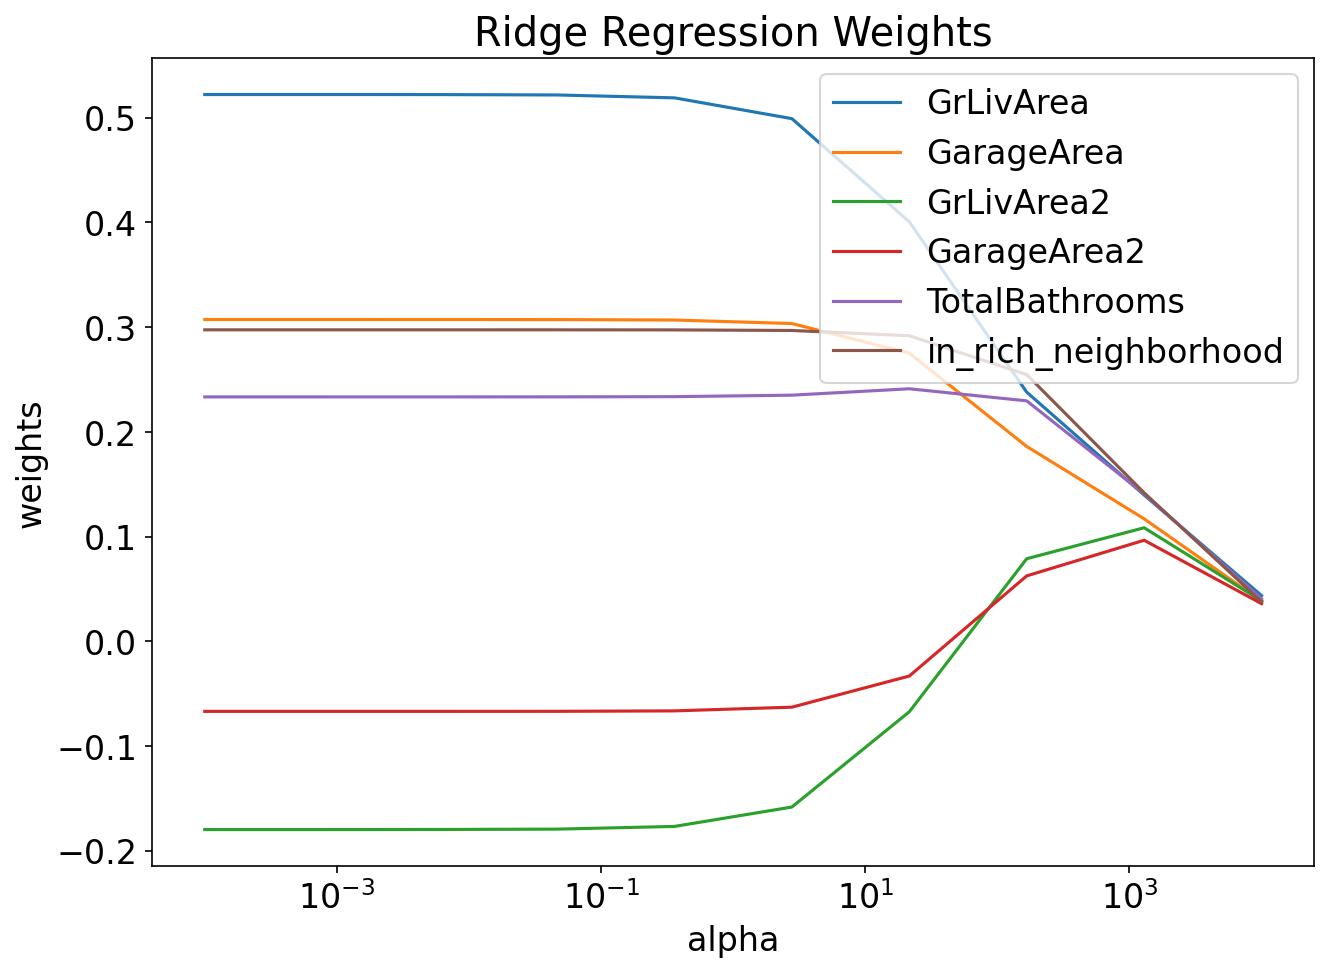

In [165]:
labels = [
    'GrLivArea','GarageArea',
    'GrLivArea2','GarageArea2',
    'TotalBathrooms','in_rich_neighborhood'
]

coefs = []
for alpha, model in models.items():
    coefs.append(model.coef_)

coefs = zip(*coefs)
fig, ax = plt.subplots(ncols=1, nrows=1)

for coef, label in zip(coefs, labels):
    plt.plot(alphas, coef, label=label)

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  # reverse axis

plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge Regression Weights')
plt.legend()

### Evaluating the Model

Is our linear model any good at predicting house prices? Let's measure the quality of our model by calculating the Mean Square Error between our predicted house prices and the observed prices.

$$
\text{MSE} = \frac{\sum_{\text{houses in test set}}^{} (\text{actual price of house} - \text{predicted price of house})^2}{\text{# of houses in data set}}
$$

Here we have a function called `mse` that calculates the error

In [166]:
def mse(observed, predicted):
 """
 Calculates RMSE from actual and predicted values
 Input:
 observed (1D array): vector of actual values
 predicted (1D array): vector of predicted/fitted values
 Output:
 a float, the root-mean square error
 """
 return np.sqrt(np.mean((observed - predicted)**2))

<b>Part 8a: Mean Square Error</b>

For each `alpha` , we use mse to calculate the training error and validating error

In [167]:
mse_training = dict()
mse_validating = dict()

for alpha, model in models.items():
     y_predict = model.predict(X_train)
     mse_training[alpha] = mse(y_predict, y_train)
    
     y_predict = model.predict(X_validate)
     mse_validating[alpha] = mse(y_predict, y_validate)

We store the calculations in dictionaries `mse_training` and `mse_validating`. Here
- key : a value for the extra parameter `alpha`
- value : mean square error of the corresponding mode

Which value of `alpha` has the smallest mean square error on the training set?

In [168]:
alpha_training_min = min(mse_training, key = mse_training.get)

In [169]:
# Check
assert alpha_training_min in alphas

Which value of `alpha` has the smallest mean square error on the validation set?

In [170]:
alpha_validating_min = min(mse_training, key = mse_validating.get)

In [171]:
# Check
assert alpha_validating_min in alphas

#### Part 8b: `SalePrice` Prediction

Using the `alpha` from <b>Part 8a</b> with the smallest mean square error on the validating set, predict `SalePrice` on the testing set. For the prediction, you can use the corresponding model fit to the data from <b>Part 7</b>.

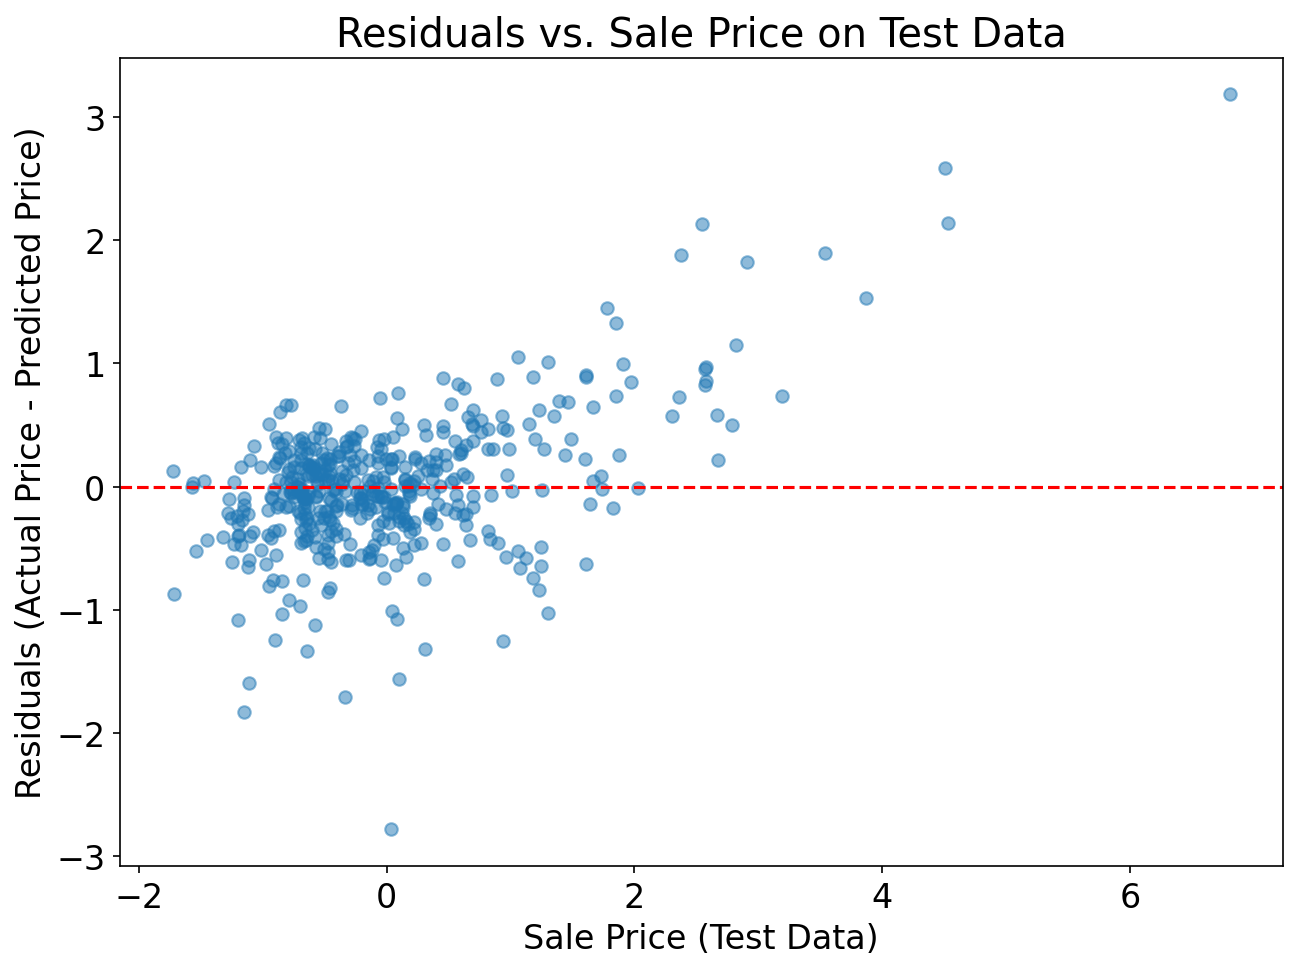

In [172]:
# Use the model corressponding to the optimal alpha value
model = models[alpha_validating_min]

# Predict SalePrice for the testing data
y_predict = model.predict(X_test)

residuals = y_test - y_predict

plt.axhline(y = 0, color = "red", linestyle = "dashed")
plt.scatter(y_test, residuals, alpha=0.5);
plt.xlabel('Sale Price (Test Data)')
plt.ylabel('Residuals (Actual Price - Predicted Price)')
plt.title("Residuals vs. Sale Price on Test Data")
part8b_gca = plt.gca(); 

We want the residuals to be close to zero. In the visualization above, we can see that most expensive homes are always more expensive than our prediction.